In [1]:
import timeit
import numpy
import mcbench.numpy
import mcbench.blas
import mcbench.cublas
import matplotlib.pyplot as plt

In [2]:
def generate_data(n_state: int):
    initial_state = numpy.zeros(n_state, dtype=numpy.double)
    initial_state[0] = 5
    delta = numpy.zeros(n_state, dtype=numpy.double)
    delta[0] = 10
    transition = numpy.zeros((n_state, n_state), dtype=numpy.double)
    idx = numpy.arange(0, n_state - 1, dtype=int)
    transition[idx, idx] = 0.9
    transition[idx, idx + 1] = 0.1
    transition[n_state - 1, n_state - 1] = 1
    return initial_state, delta, transition

In [3]:
def bench_numpy(n_state: int, n_iter: int):
    initial_state, delta, transition = generate_data(n_state)
    out = mcbench.numpy.get_state(initial_state, delta, transition, n_iter)
    print(out)

In [4]:
def bench_blas(n_state: int, n_iter: int):
    initial_state, delta, transition = generate_data(n_state)
    out = mcbench.blas.get_state(initial_state, delta, transition, n_iter)
    print(out)

In [5]:
def bench_cublas(n_state: int, n_iter: int):
    initial_state, delta, transition = generate_data(n_state)
    out = mcbench.cublas.get_state(initial_state, delta, transition, n_iter)
    print(out)

In [6]:
res_cublas =\
    timeit.repeat(
        lambda: bench_cublas(10000, 100),
        repeat=5,
        number=1
    )

[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]


In [7]:
res_blas =\
    timeit.repeat(
        lambda: bench_blas(10000, 100),
        repeat=5,
        number=1
    )

[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]


In [8]:
res_numpy =\
    timeit.repeat(
        lambda: bench_numpy(10000, 100),
        repeat=5,
        number=1
    )

[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]
[89.99774228 99.97225809 99.82985948 ...  0.          0.
  0.        ]


In [9]:
res_cublas

[0.992811933014309,
 0.535728514980292,
 0.5368591959995683,
 0.5310207149886992,
 0.5336745609820355]

In [10]:
res_blas

[6.945170013990719,
 6.928884497989202,
 6.951354579010513,
 6.92325912398519,
 6.934472938010003]

In [11]:
res_numpy

[13.145564303995343,
 12.409716518013738,
 13.253476421989035,
 12.99865550402319,
 12.862284414004534]

Text(0, 0.5, 'runtime')

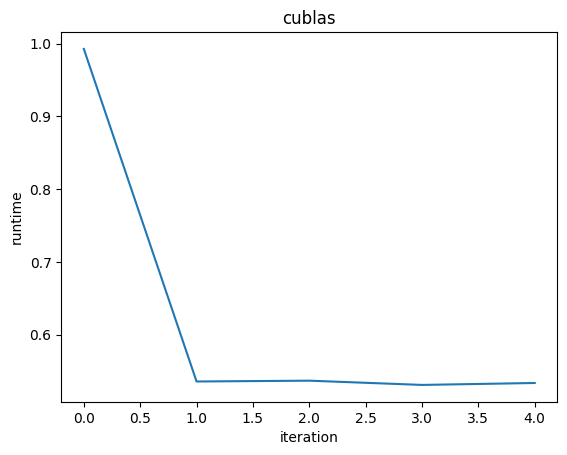

In [12]:
plt.plot(res_cublas)
plt.title("cublas")
plt.xlabel("iteration")
plt.ylabel("runtime")

Text(0, 0.5, 'frequency')

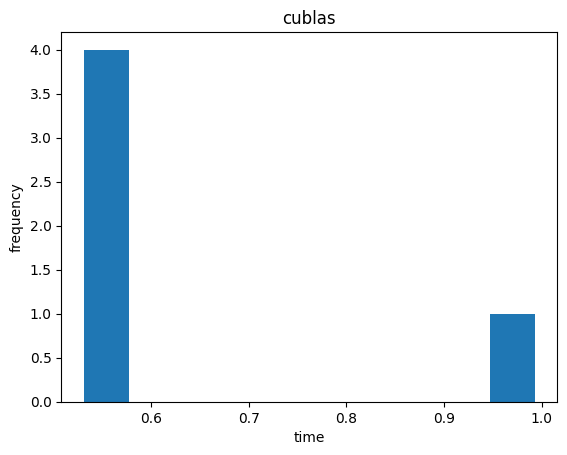

In [13]:
plt.hist(res_cublas)
plt.title("cublas")
plt.xlabel("time")
plt.ylabel("frequency")

Text(0, 0.5, 'runtime')

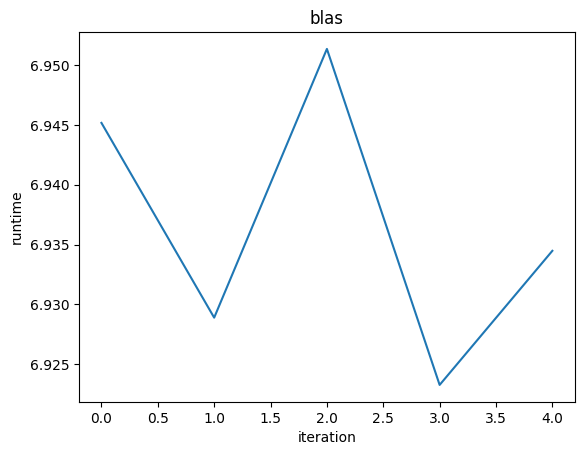

In [14]:
plt.plot(res_blas)
plt.title("blas")
plt.xlabel("iteration")
plt.ylabel("runtime")

Text(0, 0.5, 'frequency')

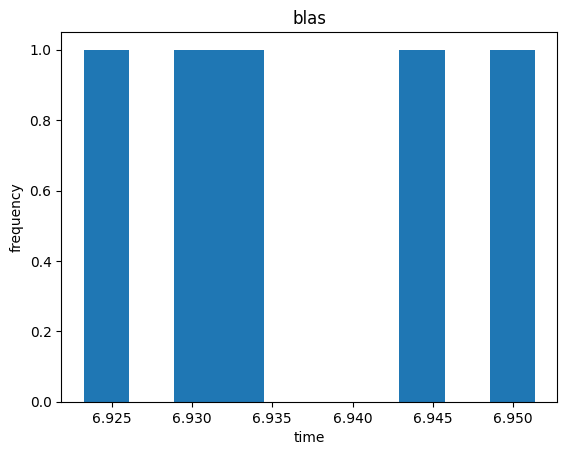

In [15]:
plt.hist(res_blas)
plt.title("blas")
plt.xlabel("time")
plt.ylabel("frequency")

Text(0, 0.5, 'runtime')

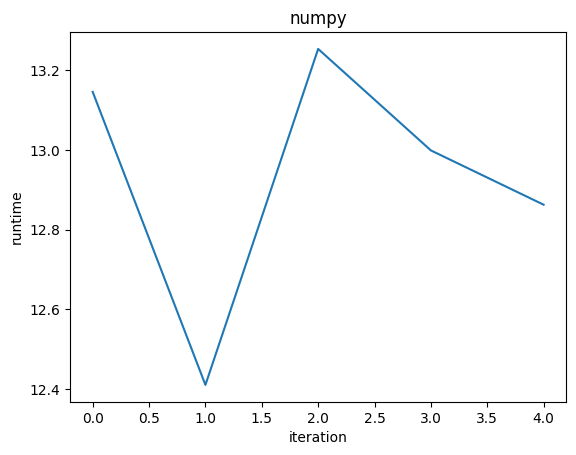

In [16]:
plt.plot(res_numpy)
plt.title("numpy")
plt.xlabel("iteration")
plt.ylabel("runtime")

Text(0, 0.5, 'frequency')

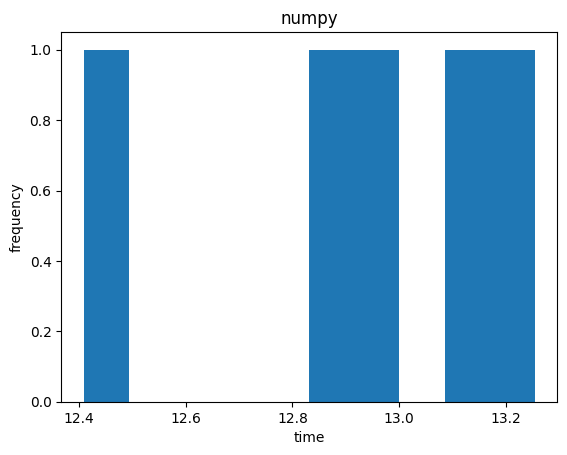

In [17]:
plt.hist(res_numpy)
plt.title("numpy")
plt.xlabel("time")
plt.ylabel("frequency")